### Q.1 Read pokemon.csv data from datasets and generate bar graph for avg of HP,Attack, defense for type1 and type2

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging

In [3]:

 # Configure logging
logging.basicConfig(filename="pokemon.log", level=logging.INFO,
                    format="%(asctime)s - %(levelname)s - %(message)s")

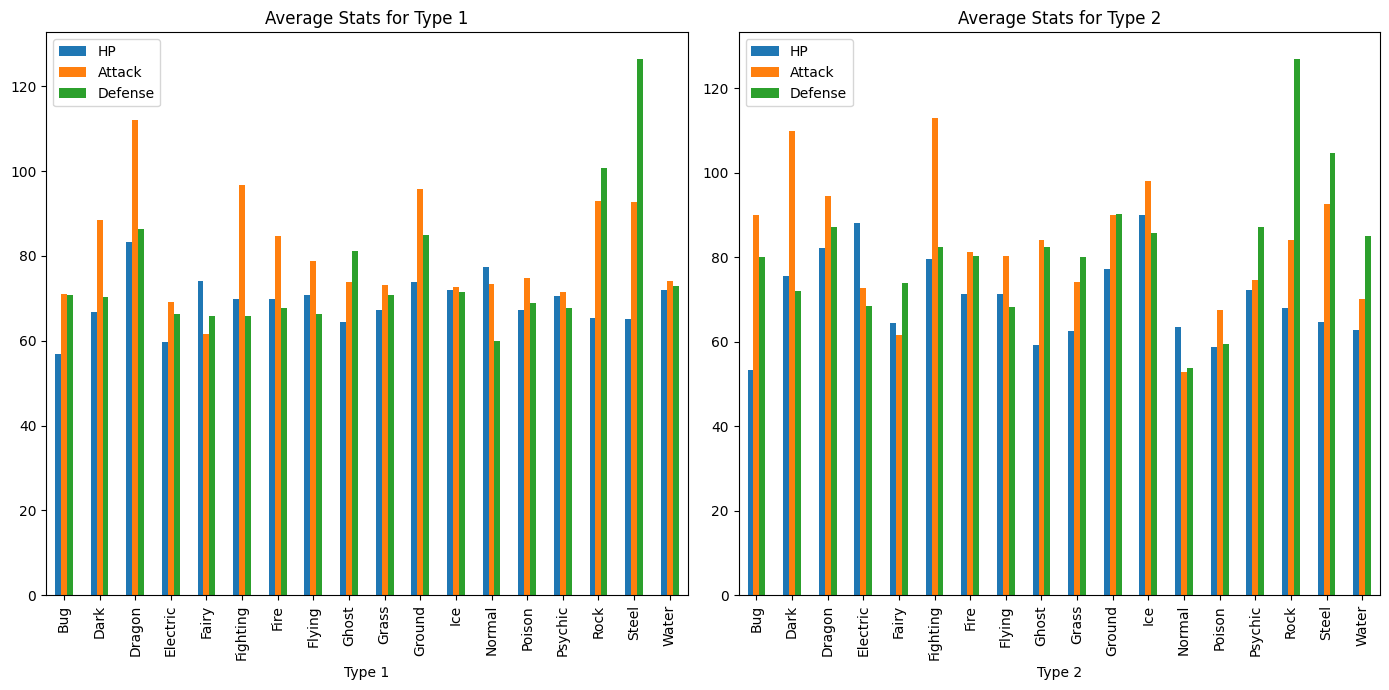

In [7]:
def analyze_pokemon_data(file_path):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        logging.info("CSV file read successfully")
 
        # Calculate the average of HP, Attack, and Defense for Type 1 and Type 2
        avg_type1 = df.groupby("Type 1")[["HP", "Attack", "Defense"]].mean()
        avg_type2 = df.groupby("Type 2")[["HP", "Attack", "Defense"]].mean()
        logging.info('Calculated average stats for Type 1 and Type 2.')

        # Plotting the bar graphs
        fig, axes = plt.subplots(1, 2, figsize=(14, 7))
        avg_type1.plot(kind="bar", ax=axes[0], title="Average Stats for Type 1")
        avg_type2.plot(kind="bar", ax=axes[1], title="Average Stats for Type 2")
        plt.tight_layout()
        plt.savefig("average_stats.png")
        logging.info("Bar graphs plotted and saved as average_stats.png.")

    except FileNotFoundError:
        logging.error("File not found")
        

    except ValueError:
        logging.error(f"Data type error. Please check the data type of the columns.")
    
          
    except Exception as e:
        logging.error(f'An error occurred: {e}')


# Call the function with the path to your CSV file
analyze_pokemon_data(r"D:\assessments\Pokemon.csv")
        

Average Total and Speed for Type 1 as Poison and Fire with Type 2 as Flying:
                    Total      Speed
Type 1 Type 2                       
Fire   Flying  551.500000  98.333333
Poison Flying  411.666667  91.666667

Average Total and Speed for Type 1 as Flying with Type 2 as Poison and Fire:
Empty DataFrame
Columns: [Total, Speed]
Index: []
Descriptive Statistics for Pokemon Data:
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.

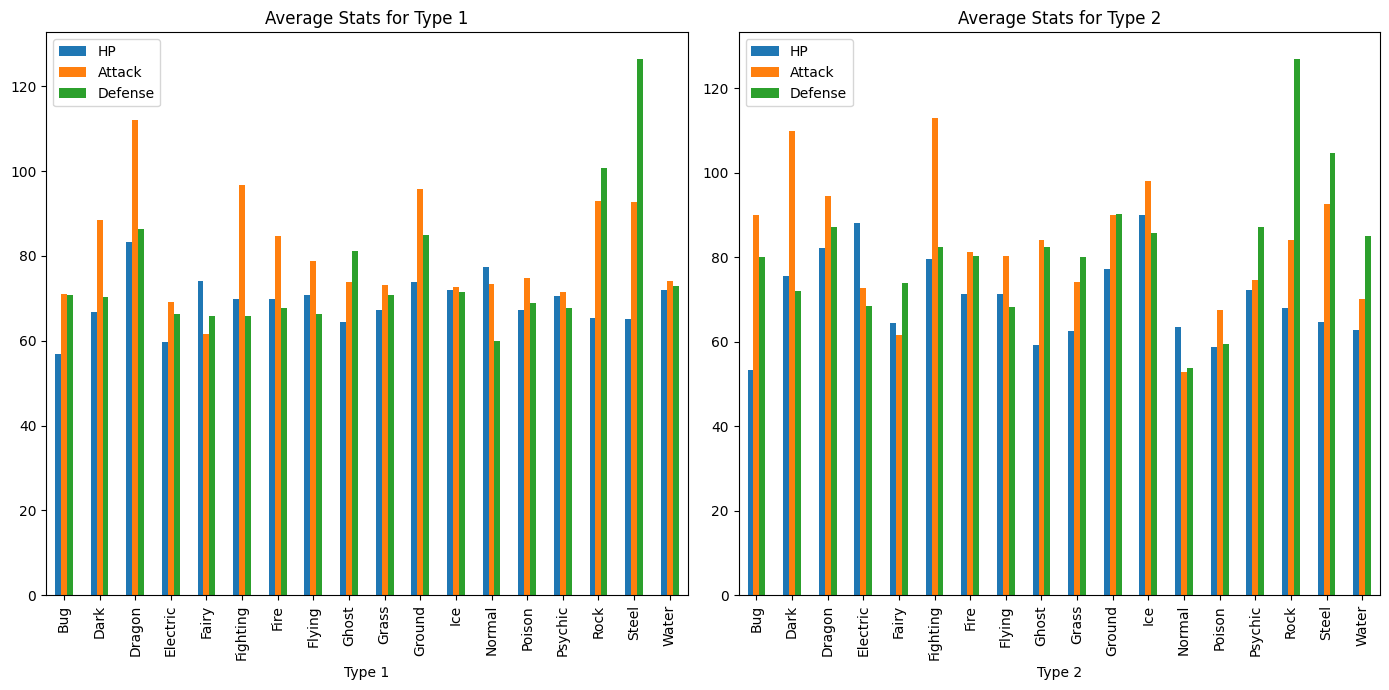

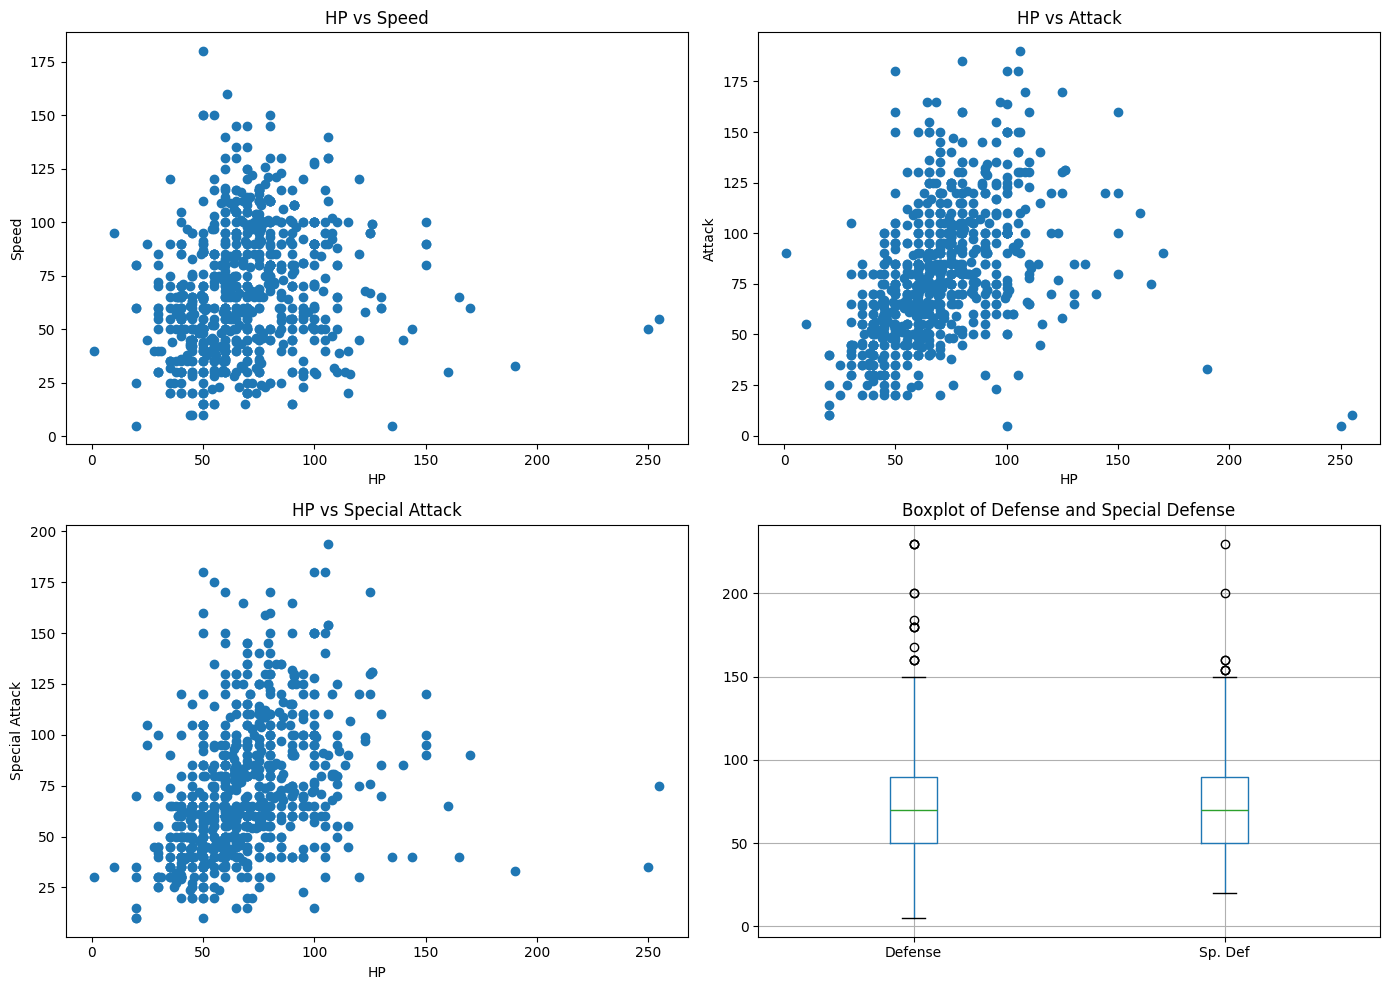

In [1]:

 
def analyze_pokemon_data(file_path):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        logging.info('CSV file read successfully.')
 
        # Calculate the average of HP, Attack, and Defense for Type 1 and Type 2
        avg_stats_type1 = df.groupby('Type 1')[['HP', 'Attack', 'Defense']].mean()
        avg_stats_type2 = df.groupby('Type 2')[['HP', 'Attack', 'Defense']].mean()
        logging.info('Calculated average stats for Type 1 and Type 2.')
 
        # Plotting the bar graphs
        fig, axes = plt.subplots(1, 2, figsize=(14, 7))
        avg_stats_type1.plot(kind='bar', ax=axes[0], title='Average Stats for Type 1')
        avg_stats_type2.plot(kind='bar', ax=axes[1], title='Average Stats for Type 2')
        plt.tight_layout()
        plt.savefig('average_stats.png')
        logging.info('Bar graphs plotted and saved as average_stats.png.')
 
        # Create four subplots
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes[0, 0].scatter(df['HP'], df['Speed'])
        axes[0, 0].set_title('HP vs Speed')
        axes[0, 0].set_xlabel('HP')
        axes[0, 0].set_ylabel('Speed')
 
        axes[0, 1].scatter(df['HP'], df['Attack'])
        axes[0, 1].set_title('HP vs Attack')
        axes[0, 1].set_xlabel('HP')
        axes[0, 1].set_ylabel('Attack')
 
        axes[1, 0].scatter(df['HP'], df['Sp. Atk'])
        axes[1, 0].set_title('HP vs Special Attack')
        axes[1, 0].set_xlabel('HP')
        axes[1, 0].set_ylabel('Special Attack')
 
        df[['Defense', 'Sp. Def']].boxplot(ax=axes[1, 1])
        axes[1, 1].set_title('Boxplot of Defense and Special Defense')
 
        plt.tight_layout()
        plt.savefig('scatter_boxplots.png')
        logging.info('Scatter plots and boxplots created and saved as scatter_boxplots.png.')
 
        # Calculate the average of Total and Speed for specific types
        poison_fire_flying = df[(df['Type 1'].isin(['Poison', 'Fire'])) & (df['Type 2'] == 'Flying')]
        flying_poison_fire = df[(df['Type 1'] == 'Flying') & (df['Type 2'].isin(['Poison', 'Fire']))]
 
        avg_poison_fire_flying = poison_fire_flying.groupby(['Type 1', 'Type 2'])[['Total', 'Speed']].mean()
        avg_flying_poison_fire = flying_poison_fire.groupby(['Type 1', 'Type 2'])[['Total', 'Speed']].mean()
 
        logging.info('Calculated average Total and Speed for specific type combinations.')
        print("Average Total and Speed for Type 1 as Poison and Fire with Type 2 as Flying:")
        print(avg_poison_fire_flying)
        print("\nAverage Total and Speed for Type 1 as Flying with Type 2 as Poison and Fire:")
        print(avg_flying_poison_fire)
 
        # Perform descriptive statistics
        desc_stats = df.describe()
        logging.info('Performed descriptive statistics on Pokemon data.')
        print("Descriptive Statistics for Pokemon Data:")
        print(desc_stats)
 
        # Find unique Type 1 and Type 2 where total score is more than 500 but attack and defense are more than average
        avg_attack = df['Attack'].mean()
        avg_defense = df['Defense'].mean()
        filtered_df = df[(df['Total'] > 500) & (df['Attack'] > avg_attack) & (df['Defense'] > avg_defense)]
        unique_types = filtered_df[['Type 1', 'Type 2']].drop_duplicates()
 
        logging.info('Filtered unique Type 1 and Type 2 based on conditions.')
        print("Unique Type 1 and Type 2 where total score is more than 500 and attack and defense are more than average:")
        print(unique_types)
 
    except FileNotFoundError:
        logging.error('File not found. Please check the file path.')
        print("File not found. Please check the file path.")
    except Exception as e:
        logging.error(f'An error occurred: {e}')
        print(f"An error occurred: {e}")
 
# Call the function with the path to your CSV file
analyze_pokemon_data(r"D:\assessments\Pokemon.csv")

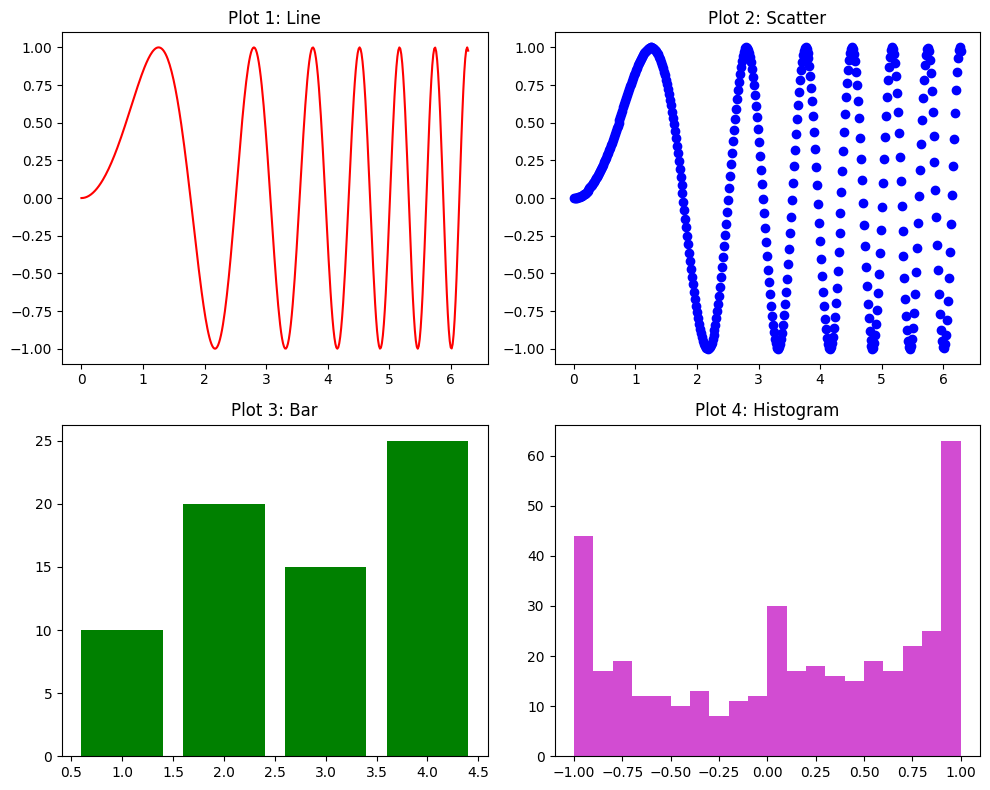

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid of subplots with custom figure size

# Plot on each subplot
axs[0, 0].plot(x, y, 'r-')  # Red solid line
axs[0, 0].set_title('Plot 1: Line')

axs[0, 1].scatter(x, y, c='b', marker='o')  # Blue dots
axs[0, 1].set_title('Plot 2: Scatter')

axs[1, 0].bar(np.arange(1, 5), [10, 20, 15, 25], color='g')  # Green bars
axs[1, 0].set_title('Plot 3: Bar')

axs[1, 1].hist(y, bins=20, color='m', alpha=0.7)  # Magenta histogram with transparency
axs[1, 1].set_title('Plot 4: Histogram')

# Adjust layout
plt.tight_layout()
plt.show()


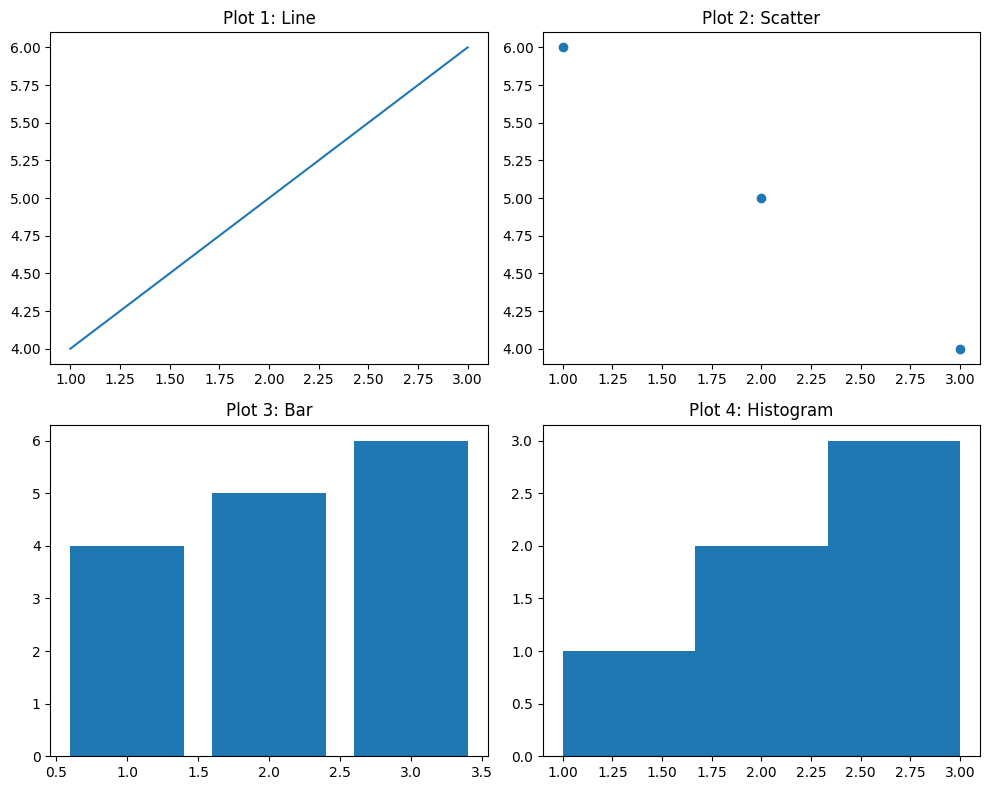

In [18]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 8))

# First subplot
plt.subplot(2, 2, 1)  # (nrows, ncols, index)
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('Plot 1: Line')

# Second subplot
plt.subplot(2, 2, 2)
plt.scatter([1, 2, 3], [6, 5, 4])
plt.title('Plot 2: Scatter')

# Third subplot
plt.subplot(2, 2, 3)
plt.bar([1, 2, 3], [4, 5, 6])
plt.title('Plot 3: Bar')

# Fourth subplot
plt.subplot(2, 2, 4)
plt.hist([1, 2, 2, 3, 3, 3], bins=3)
plt.title('Plot 4: Histogram')

# Adjust layout
plt.tight_layout()
plt.show()


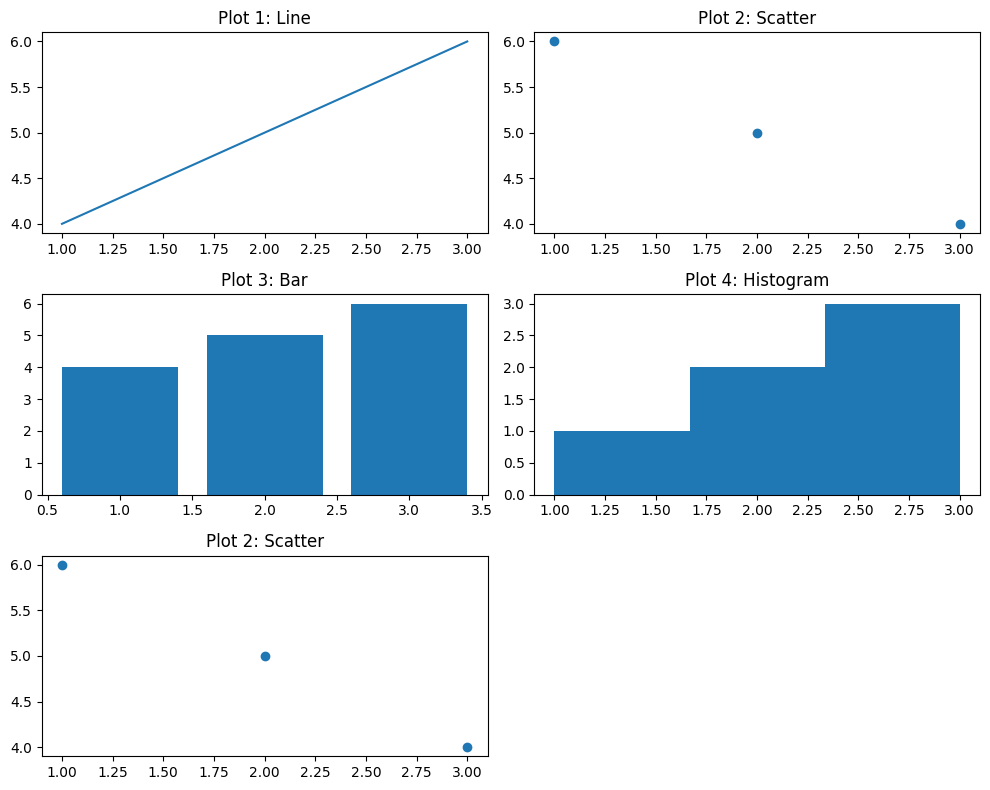

In [19]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 8))

# First subplot
plt.subplot(3, 2, 1)  # (nrows, ncols, index)
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('Plot 1: Line')

# Second subplot
plt.subplot(3, 2, 2)
plt.scatter([1, 2, 3], [6, 5, 4])
plt.title('Plot 2: Scatter')

# Third subplot
plt.subplot(3, 2, 3)
plt.bar([1, 2, 3], [4, 5, 6])
plt.title('Plot 3: Bar')

# Fourth subplot
plt.subplot(3, 2, 4)
plt.hist([1, 2, 2, 3, 3, 3], bins=3)
plt.title('Plot 4: Histogram')

plt.subplot(3, 2, 5)
plt.scatter([1, 2, 3], [6, 5, 4])
plt.title('Plot 2: Scatter')

# Adjust layout
plt.tight_layout()
plt.show()
